In [33]:
import sys
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
from numpy import *
import matplotlib.pyplot as plt
import fileread as fr
import predefined as pd
import wave_ops as wo
from scipy.optimize import curve_fit

def sim_thresh(x,thresh):
    length=len(x)
    trutharray=ones(length,dtype=bool)
    thresh=15.
    i=0
    while i < length-2:
        j=i+1
        backscattering=x['entry'][i]==x['entry'][j]
        energy=x['energy'][i]
        while backscattering and j<length-2:
            if x['detector'][j]== x['detector'][i] and x['pixel'][j]== x['pixel'][i]:
                energy+=x['energy'][j]
            j+=1
            backscattering=x['entry'][i]==x['entry'][j]
        if energy < thresh:
            trutharray[i]=False
            j=i+1
            backscattering=x['entry'][i]==x['entry'][j]
            while backscattering and j <length-2:
                if x['energy'][j]< thresh:
                    trutharray[j]=False
                j+=1
                backscattering=x['entry'][i]==x['entry'][j]
        i=j
    return trutharray

simloc='/home/noah/Desktop/large_analysis/zeck_simulation/'
sim=fr.simulation(simloc+'45Caaf.txt')
#c=snsim=pd.sim_spixel_cut(snsim)
#snsim=pd.sim_comb_single_pixel(snsim)
sim=sim[logical_not(isnan(sim['energy']))]

/home/noah/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


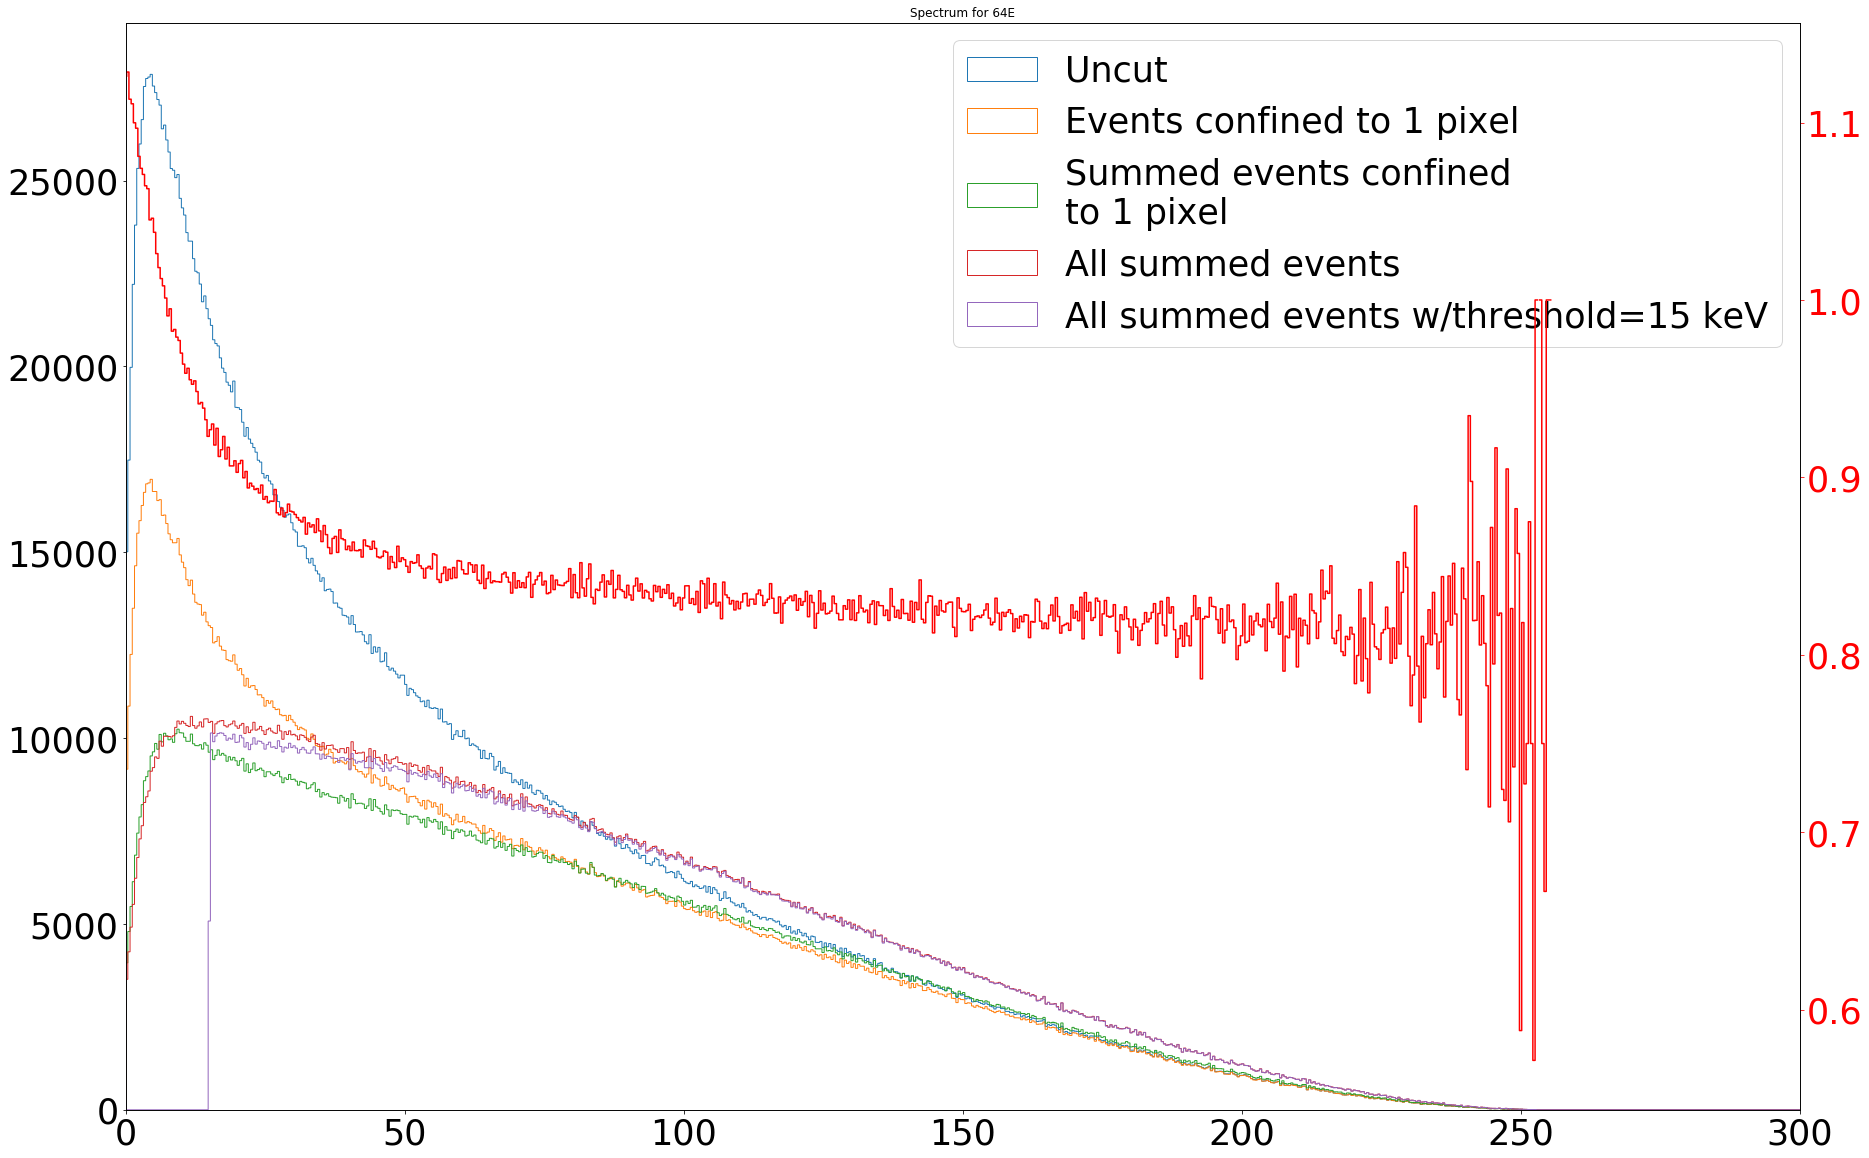

In [39]:
bd,ch=4,3
fs=35
plt.figure(figsize=(30,20))
cut=pd.sim_single_pixel(sim,bd,ch)
plt.hist(cut['energy'],bins=2000,range=[0,800],histtype='step',label='Uncut')

cut=pd.sim_spixel_cut(sim)
cut=pd.sim_single_pixel(cut,bd,ch)
plt.hist(cut['energy'],bins=2000,range=[0,800],\
         histtype='step',label='Events confined to 1 pixel')


cut=pd.sim_spixel_cut(sim)
cut=pd.sim_comb_single_pixel(cut)
cut=pd.sim_single_pixel(cut,bd,ch)
h1,b=histogram(cut['energy'],bins=2000,range=[0,800])
b=pd.cbins(b)
plt.hist(cut['energy'],bins=2000,range=[0,800],\
         histtype='step',label='Summed events confined \nto 1 pixel')

cut=pd.sim_comb_single_pixel(sim)
cut=pd.sim_single_pixel(cut,bd,ch)
h2,b=histogram(cut['energy'],bins=2000,range=[0,800])
b=pd.cbins(b)
plt.hist(cut['energy'],bins=2000,range=[0,800],\
         histtype='step',label='All summed events')

cut=sim[sim_thresh(sim,15)]
cut=pd.sim_comb_single_pixel(cut)
cut=pd.sim_single_pixel(cut,bd,ch)
plt.hist(cut['energy'],bins=2000,range=[0,800],\
         histtype='step',label='All summed events w/threshold=15 keV')


plt.legend(fontsize=fs)
plt.tick_params(labelsize=fs)
plt.yscale('linear')
plt.xlim(0,300)

plt.twinx()
h1,h2=array(h1),array(h2)
plt.plot(b,h1/h2,c='r',ls='steps')
plt.tick_params('y',colors='r',labelsize=fs)



plt.title('Spectrum for '+pd.pixel(bd,ch), fontsize=fs)
plt.show()

396727141.21002454 396726966.810819 99.99995604051564


/home/noah/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


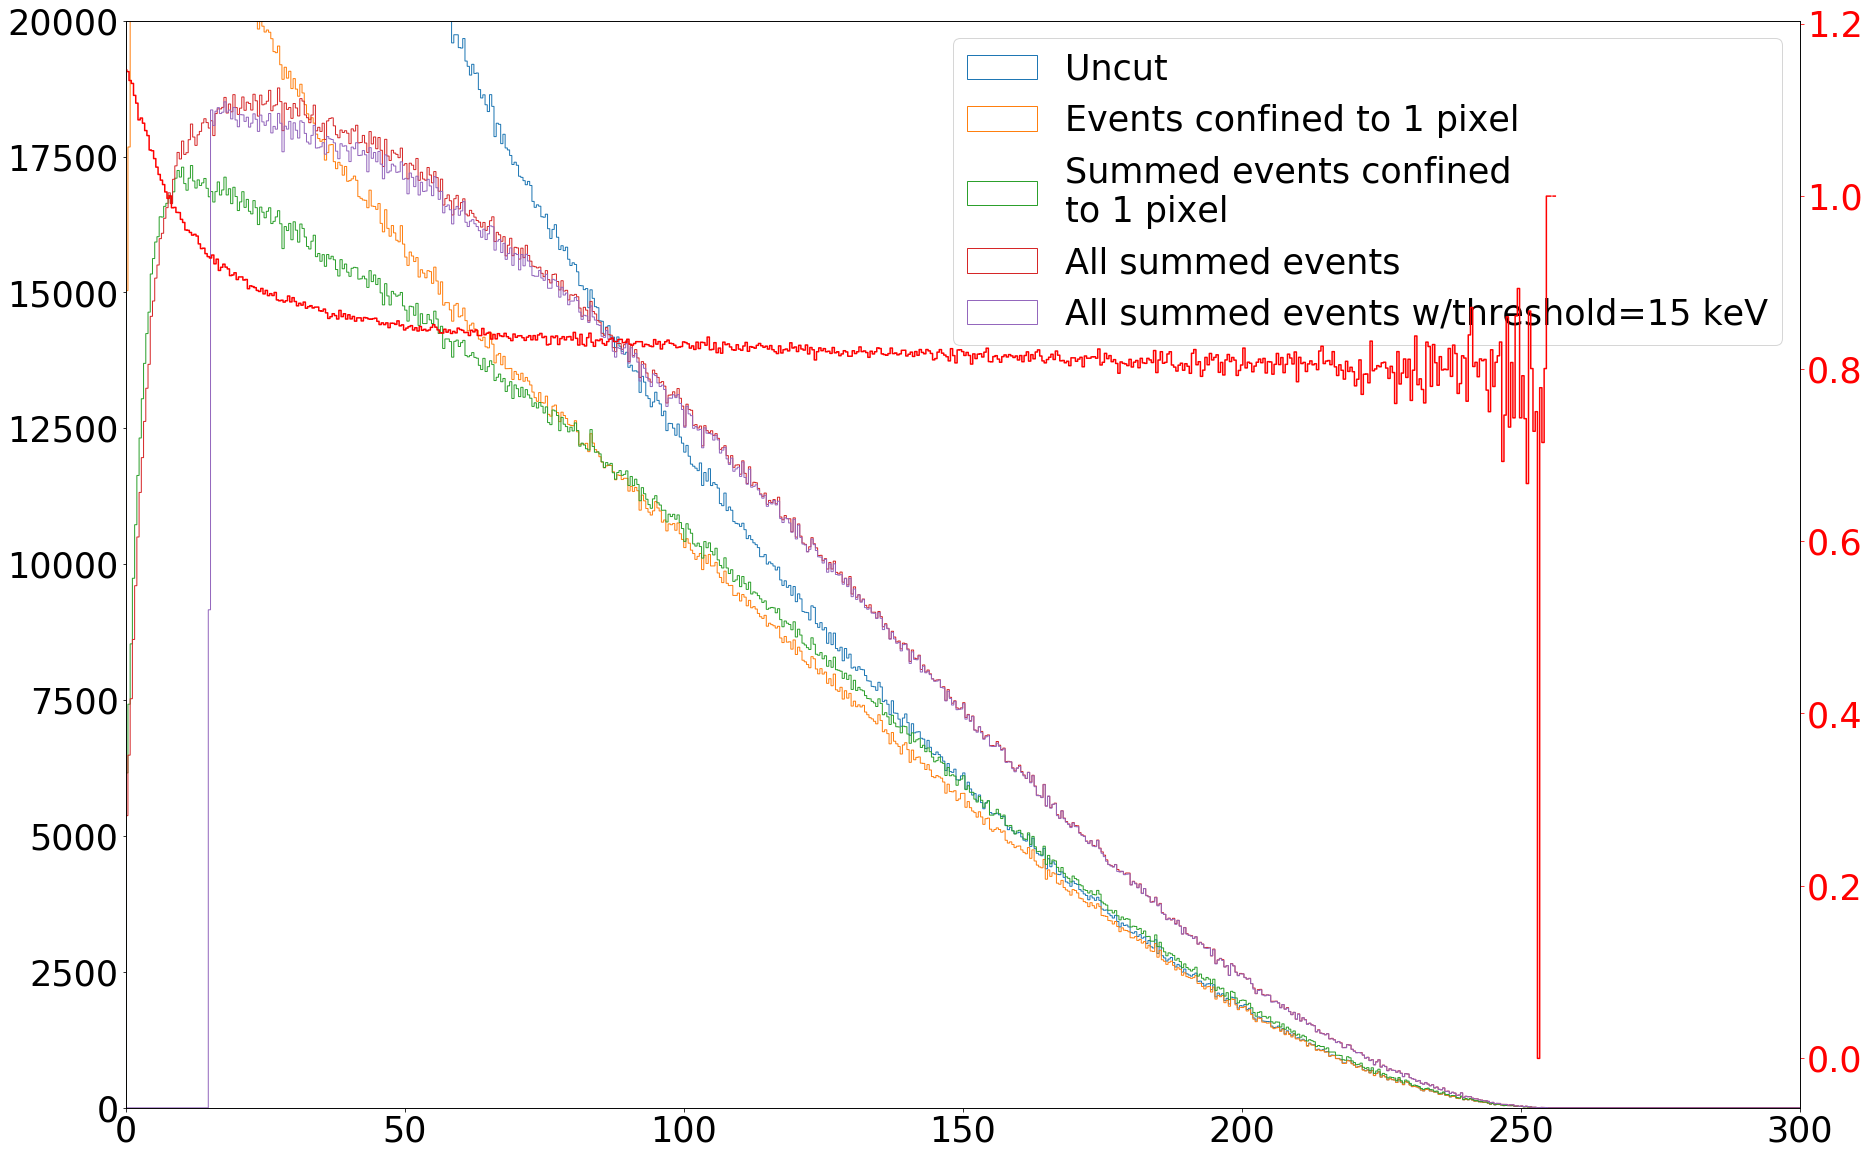

In [45]:
fs=35
plt.figure(figsize=(30,20))
cut=sim
plt.hist(cut['energy'],bins=2000,range=[0,800],histtype='step',label='Uncut')

cut=pd.sim_spixel_cut(sim)
h1,b=histogram(cut['energy'],bins=2000,range=[0,800])
b=pd.cbins(b)
sum1=sum(h1*b)
plt.hist(cut['energy'],bins=2000,range=[0,800],\
         histtype='step',label='Events confined to 1 pixel')


cut=pd.sim_spixel_cut(sim)
cut=pd.sim_comb_single_pixel(cut)
h1,b=histogram(cut['energy'],bins=2000,range=[0,800])
b=pd.cbins(b)
sum2=sum(h1*b)
plt.hist(cut['energy'],bins=2000,range=[0,800],\
         histtype='step',label='Summed events confined \nto 1 pixel')
print (sum1,sum2,sum2/sum1*100)
cut=pd.sim_comb_single_pixel(sim)
h2,b=histogram(cut['energy'],bins=2000,range=[0,800])
b=pd.cbins(b)
plt.hist(cut['energy'],bins=2000,range=[0,800],\
         histtype='step',label='All summed events')

cut=sim[sim_thresh(sim,15)]
cut=pd.sim_comb_single_pixel(cut)
plt.hist(cut['energy'],bins=2000,range=[0,800],\
         histtype='step',label='All summed events w/threshold=15 keV')


plt.legend(fontsize=fs)
plt.tick_params(labelsize=fs)
plt.yscale('linear')
plt.ylim(1,2e4)
plt.xlim(0,300)

plt.twinx()
h1,h2=array(h1),array(h2)
plt.plot(b,h1/h2,c='r',ls='steps')
plt.tick_params('y',colors='r',labelsize=fs)


plt.show()